In [ ]:
import pandas as pd # 데이터 전처리
import numpy as np # 데이터 전처리
import random #데이터 전처리
from pandas import DataFrame #데이터 전처리
from collections import Counter #데이터 전처리

from tqdm import tqdm #시간 측정용

from sklearn.feature_extraction.text import CountVectorizer # model setting
from sklearn.model_selection import train_test_split  # model setting

from sklearn.naive_bayes import MultinomialNB  # model 관련
from sklearn.metrics import roc_auc_score  # model 성능 확인

import joblib
import re
from tqdm import tqdm_notebook
import os
import pickle

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
cd gdrive/My\ Drive/kb_data

/content/gdrive/My Drive/kb_data


In [ ]:
prepared_train = pd.read_csv('prepared_train.csv', encoding='utf-8')

In [ ]:
del prepared_train['Unnamed: 0']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier
import lightgbm
import joblib

In [ ]:
#X_train = prepared_train.drop(['year_month', 'text', 'morph', 'orgin', 'smishing'], axis='columns')
X_origin = prepared_train['text']
Y_label = prepared_train['smishing']

In [ ]:
#train - test 분류
# 인덱싱 문제로 순서대로 train / test split
%%time
X_train, X_test, Y_train, Y_test = train_test_split(X_origin,
                                                    Y_label,
                                                    test_size = 0.2,
                                                    shuffle = False)
                                                    # random_state = 1825)

CPU times: user 26.3 ms, sys: 0 ns, total: 26.3 ms
Wall time: 27.3 ms


In [ ]:
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [ ]:
max_words = 10000
tokenizer = Tokenizer(num_words = max_words)

In [ ]:
tokenizer.fit_on_texts(X_train)

In [ ]:

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

CPU times: user 9.88 s, sys: 42 ms, total: 9.92 s
Wall time: 9.93 s


문자의 최대 길이 : 264
문자의 평균 길이 :  22.655506090658736


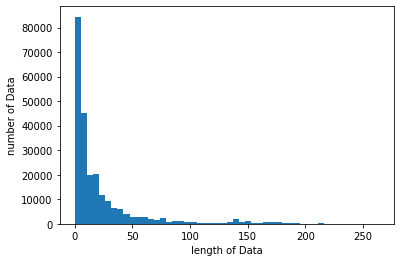

In [ ]:
import matplotlib.pyplot as plt

print("문자의 최대 길이 :" , max(len(l) for l in X_train))
print("문자의 평균 길이 : ", sum(map(len, X_train))/ len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

문자의 최대 길이 :  239
문자의 평균 길이 :  33.86110594874047


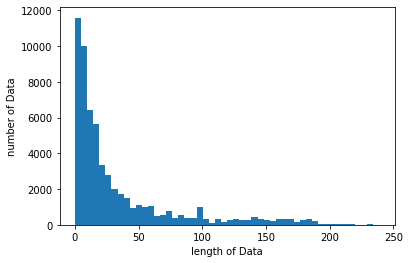

In [ ]:
print("문자의 최대 길이 : ", max(len(l) for l in X_test))
print("문자의 평균 길이 : ", sum(map(len, X_test))/ len(X_test))
plt.hist([len(s) for s in X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

## label_data onehotencoding
- smishing: 1 0
- normal : 0 1
## 반대로 했다 고쳐라잉!


In [ ]:
YY_train = pd.DataFrame(Y_train)

In [ ]:
YY_train['smishing2'] = 1

In [ ]:
for idx in YY_train.index:
    if YY_train['smishing'][idx] == 1:
        YY_train['smishing2'][idx] = 0

In [ ]:
Y_test.head()

id
236756    0
236757    0
236758    0
236759    0
236760    0
Name: smishing, dtype: int64

In [ ]:
YY_train.head()

,smishing,smishing2
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [ ]:
from keras.layers import Embedding, Dense, LSTM
from keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences

In [ ]:
%%time
max_len = 264

X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

CPU times: user 1.5 s, sys: 135 ms, total: 1.63 s
Wall time: 1.63 s


In [ ]:
type(X_train)

numpy.ndarray

In [ ]:
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))

model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.1)

In [ ]:
%%time
model3 = Sequential()
model3.add(Embedding(max_words, 100))
model3.add(LSTM(128))
model3.add(Dense(2, activation='sigmoid'))
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model3.save("model_kb_dacon_14.h5")

In [ ]:
from keras.models import load_model
model3 = load_model('model_kb_dacon_14.h5')

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [ ]:
history3 = model3.fit(X_train, YY_train, epochs=2, batch_size=32, validation_split=0.1)

Train on 213080 samples, validate on 23676 samples
Epoch 1/2
  1120/213080 [..............................] - ETA: 37:09 - loss: 0.0030 - accuracy: 0.9991

KeyboardInterrupt: ignored

AttributeError: ignored

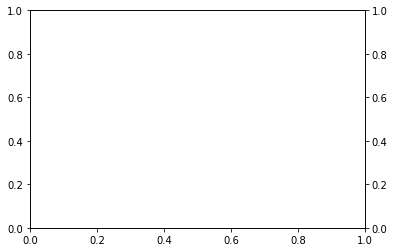

In [ ]:
fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(model3.history['loss'], 'y', label='train loss')
loss_ax.plot(model3.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(model3.history['acc'], 'b', label='train acc')
acc_ax.plot(model3.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [ ]:
mypredict = model3.predict(X_test)

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X_origin,
                                                    Y_label,
                                                    test_size = 0.2,
                                                    shuffle = False)
                                                    # random_state = 1825)

In [ ]:
X_test2.index

Int64Index([236756, 236757, 236758, 236759, 236760, 236761, 236762, 236763,
            236764, 236765,
            ...
            295935, 295936, 295937, 295938, 295939, 295940, 295941, 295942,
            295943, 295944],
           dtype='int64', length=59189)

In [ ]:
temp_predictions = np.zeros((X_test.shape[0],2))

In [ ]:
temp_predictions += mypredict

In [ ]:
temp_predictions

array([[3.57349345e-05, 9.99955714e-01],
       [1.30176544e-04, 9.99910653e-01],
       [5.04744412e-06, 9.99996781e-01],
       ...,
       [4.21138736e-07, 9.99999702e-01],
       [1.51911775e-06, 9.99998748e-01],
       [1.35478867e-05, 9.99984741e-01]])

In [ ]:
submission = pd.DataFrame(data=np.zeros((X_test.shape[0],2)))
submission.index = Y_test.index 
submission.index.name = 'id'
submission+=temp_predictions
submission = submission.sort_index()
submission = submission.groupby('id').mean()


In [ ]:
submission

,0,1
id,,
236756,3.573493e-05,0.999956
236757,1.301765e-04,0.999911
236758,5.047444e-06,0.999997
236759,1.448989e-04,0.999854
236760,3.410329e-07,1.000000
...,...,...
295940,1.792422e-05,0.999984
295941,4.588366e-04,0.999415
295942,4.211387e-07,1.000000


In [ ]:
submission['pred'] = 0
for idx in submission.index:
    if (submission[0][idx] > submission[1][idx]):
        submission['pred'][idx]= 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
submission

,0,1,pred
id,,,
236756,3.573493e-05,0.999956,0
236757,1.301765e-04,0.999911,0
236758,5.047444e-06,0.999997,0
236759,1.448989e-04,0.999854,0
236760,3.410329e-07,1.000000,0
...,...,...,...
295940,1.792422e-05,0.999984,0
295941,4.588366e-04,0.999415,0
295942,4.211387e-07,1.000000,0


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
result = classification_report(Y_test, submission['pred'], target_names=['normal','smishing'])

In [ ]:
print(result)

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00     51205
    smishing       0.98      0.98      0.98      7984

    accuracy                           1.00     59189
   macro avg       0.99      0.99      0.99     59189
weighted avg       1.00      1.00      1.00     59189



In [ ]:
false_pos_text = list()
false_neg_text = list()

false_pos_idx = list()
false_neg_idx = list()

for idx in submission.index:
    # false negative: 실제로는 양성인데, 검사결과 음성
    if (prepared_train['smishing'][idx] == 1):
        if submission['pred'][idx] == 0:
            false_neg_idx.append(idx)
            false_neg_text.append(prepared_train['orgin'][idx])
    # false positve: 실제로는 음성인데, 검사결과 양성
    elif (prepared_train['smishing'][idx] == 0):
        if submission['pred'][idx] == 1:
            false_pos_idx.append(idx)
            false_pos_text.append(prepared_train['orgin'][idx])

In [ ]:
len(false_pos_idx)

159

In [ ]:
len(false_neg_idx)

133

In [ ]:
print(false_pos_idx)

[237186, 237337, 237789, 238551, 238552, 238672, 239076, 239287, 239513, 239969, 240252, 240359, 240525, 240690, 240748, 241662, 241780, 242338, 242723, 242741, 242788, 243005, 243075, 243846, 244082, 244274, 244807, 244978, 244999, 245089, 245267, 245534, 245558, 246004, 246327, 246879, 247235, 247302, 247577, 247608, 247912, 248136, 248319, 248890, 249049, 249116, 249198, 249738, 249813, 249832, 250449, 250672, 250842, 251071, 251763, 251931, 252095, 253061, 253094, 253096, 253138, 253173, 253465, 253539, 253853, 253921, 254067, 254068, 254086, 254177, 254463, 255178, 256120, 256497, 256690, 257224, 257314, 257728, 258120, 258692, 259088, 259222, 259719, 260441, 261358, 261571, 262616, 262691, 262771, 264866, 266030, 266559, 266874, 267182, 267194, 268568, 269049, 269287, 270245, 271450, 271503, 272917, 273582, 274570, 275224, 275432, 275633, 276247, 276598, 277037, 277694, 278052, 279144, 279393, 279437, 279738, 280138, 283278, 283312, 283729, 286137, 286440, 286777, 287583, 288350,

In [ ]:
a = [256005,
 287239,
 257551,
 292368,
 275522,
 255064,
 259673,
 282717,
 275060,
 287888,
 258711,
 293527,
 257704,
 259761,
 260286,
 283839,
 255179,
 280781,
 258259,
 259805,
 250099,
 255764,
 258851,
 270633,
 257893,
 259432,
 289651,
 258933,
 253852,
 258462,
 257966,
 243634,
 257463,
 260036,
 258012,
 256990,
 242668,
 255484]

In [ ]:
type(a)

list

In [ ]:
sum = 0
for i in false_pos_idx:
    for k in a:
        if (i == k):
            sum+=1

In [ ]:
sum

0